## Module 4 Lab - Anomaly Detection

_Anomaly detection (also outlier detection) is the identification of items, events or observations which do not conform to an expected pattern or other items in a dataset - wikipedia.com_

Most of the times outliers are a by product of clustering algorithms. Clustering algorithms are not designed to detect outliers but rather to form clusters of data. The accuracy of how well outliers are detected depends on how well clustering algorithms can capture the structures. Sometimes a set of similar abnormal objects are group as a cluster. 

#### Outliers

Outliers are the samples that are exceptionally far from the mainstream of data. There is no rigid mathematical definition of what constitutes an outlier; determining whether or not an observation is an outlier is ultimately a subjective exercise. There are various methods of outlier detection. Some are graphical such as normal probability plots. Others are model-based.

There are two main types of outliers, representative and nonrepresentative. A representative outlier is one that is a correct or valid observation that "cannot be regarded as unique". While this type of outlier is considered an extreme value, it should be retained, with special treatment during the analysis stages. A nonrepresentative outlier is one that is an "incorrect observation" (i.e., due to an error in data entry, coding, or measurement) or is considered unique because there are no other values like it in the population. Nonrepresentative outliers should be corrected or excluded from the analysis.

Predictive modeling techniques can be impacted as a result of presence of outliers. Dealing with outliers in data analysis is one of the important challenges. Detecting outliers and understanding them can lead to interesting findings. Outliers can impact accuracy of predictive models. Detecting outliers and dealing with them is a critical step in data preparation for predictive modeling. Below picture shows how an outlier can impact the overall fit of a linear regression model. Lets discuss how PCA technique can be used for detecting outliers in multivariate datasets. 

<img src="../Images/outlier.PNG">

#### Methods to detect outliers:

There are several approaches for detecting Outliers. Charu Aggarwal in his book [Outlier Analysis](http://www.charuaggarwal.net/outlierbook.pdf) classifies Outlier detection models in following groups:

**Extreme Value Analysis:** This is the most basic form of outlier detection and only good for 1-dimension data. In these types of analysis, it is assumed that values which are too large or too small are outliers. Z-test and Student’s t-test are examples of these statistical methods. These are good heuristics for initial analysis of data but they don’t have much value in multivariate settings. They can be used as final steps for interpreting outputs of other outlier detection methods.

**Probabilistic and Statistical Models:** These models assume specific distributions for data. Then using the expectation-maximization(EM) methods they estimate the parameters of the model. Finally, they calculate probability of membership of each data point to calculated distribution. The points with low probability of membership are marked as outliers.

**Linear Models:** These methods model the data into a lower dimensional sub-spaces with the use of linear correlations. Then the distance of each data point to plane that fits the sub-space is being calculated. This distance is used to find outliers. PCA(Principal Component Analysis) is an example of linear models for anomaly detection.

**Proximity-based Models:** The idea with these methods is to model outliers as points which are isolated from rest of observations. Cluster analysis, density based analysis and nearest neighborhood are main approaches of this kind.

**Information Theoretic Models:** The idea of these methods is the fact that outliers increase the minimum code length to describe a data set. High-Dimensional Outlier Detection: Specifc methods to handle high dimensional sparse data

#### Outlier Detection Using Principal Component Analysis

PCA is a statistical procedure that uses a transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set.

Using PCA we can map our dataset with n-dimension (possibly correlated variables) to a k-dimensional sub-space of k uncorrelated components (k<=n).

Below are steps for detecting anomalies using PCA:

First we map the data set from its original n-dimensional space to k-dimensional subspace using PCA

- Calculate the centroid of data points (μ)
- Calculate the variance of each component (λ)
- Calculate the score of each data point using below formula:

<img src="../Images/PCA_formula.png">

- Finally, use extreme value analysis methods to find data points with extreme scores

You dont have to worry about applying above formula to calculate scores. PCA is alreday implemented. You just have to call the method to find scores.

In [1]:
# install.packages("psych",dependencies = TRUE, repos = c(CRAN="https://cran.r-project.org/"))
library(psych)

In [2]:
# First we load the diamonds dataset
library(ggplot2)
data(diamonds)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [3]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [3]:
# Run the cell to know more about data
help(diamonds)

In [5]:
# Convert the categorical variables to dummy variables as PCA doesn't run with character type factors. dummy variables 
# are explained below with example cde.
# Use dummy.code from psych package
codedData <- cbind(diamonds,dummy.code(diamonds$cut),dummy.code(diamonds$color),dummy.code(diamonds$clarity))

**Reference: ** [Dummy coding the data](http://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/)

Below piece of code illustrates how dummy coding words

In [4]:
# Generate example dataframe with character column
example <- as.data.frame(c("A", "A", "B", "F", "C", "G", "C", "D", "E", "F"))
names(example) <- "strcol"

# For every unique value in the string column, create a new 1/0 column
# This is what Factors do "under-the-hood" automatically when passed to function requiring numeric data
for(level in unique(example$strcol)){
  example[paste("dummy", level, sep = "_")] <- ifelse(example$strcol == level, 1, 0)
}
example

strcol,dummy_A,dummy_B,dummy_F,dummy_C,dummy_G,dummy_D,dummy_E
A,1,0,0,0,0,0,0
A,1,0,0,0,0,0,0
B,0,1,0,0,0,0,0
F,0,0,1,0,0,0,0
C,0,0,0,1,0,0,0
G,0,0,0,0,1,0,0
C,0,0,0,1,0,0,0
D,0,0,0,0,0,1,0
E,0,0,0,0,0,0,1
F,0,0,1,0,0,0,0


From output of below str() command, you can see five new columns 11 to 15 are created for the corresponding 5 levels in cut variable. Like wise, seven new columns are created for 7 levels in color factor variable and finally eight new dummy columns are created for the 8 levels in clarity variable. 

In [7]:
str(codedData)

'data.frame':	53940 obs. of  30 variables:
 $ carat    : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut      : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color    : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity  : Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth    : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table    : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price    : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x        : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y        : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z        : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...
 $ Fair     : num  0 0 0 0 0 0 0 0 1 0 ...
 $ Good     : num  0 0 1 0 1 0 0 0 0 0 ...
 $ Very Good: num  0 0 0 0 0 1 1 1 0 1 ...
 $ Premium  : num  0 1 0 1 0 0 0 0 0 0 ...
 $ Ideal    : num  1 0 0 0 0 0 0 0 0 0 ...
 $ D        : num  0 0 

Columns 2, 3, 4 are factors with charaters values. Remove these columns from data as PCA can only work with numeric data. 

In [8]:
codedData <- codedData[,-c(2,3,4)]

Use the prcomp method to find Principal components

In [9]:
pr <- prcomp(codedData,center = TRUE, scale. = TRUE)

**Scores: ** The positions of each observation in this new coordinate system of principal components are called scores and are calculated as linear combinations of the original variables and the weights aij. For example, the score for the rth sample on the kth principal component is calculated as

$$Y_{kr} = a_{k1}x_{k1} + a_{k2}x_{k2} + ... + a_{kp}x_{kp}$$

**Reference: ** [PCA tutorial](http://strata.uga.edu/software/pdf/pcaTutorial.pdf)

These scores are nothing but the principal components. 

We want to sum all the principal component values for each row which will be score for the row.

In [10]:
components <- pr$x
scores <- rowSums(components)
scores[1:10]

[1]  -3.337870 -13.580270  -5.866020  -9.269450   5.232753  -4.086696
 [7]  -7.665849  -7.007317   5.667708  -6.372908

In [11]:
?boxplot

Plot the histogram and boxplot for the scores calculated

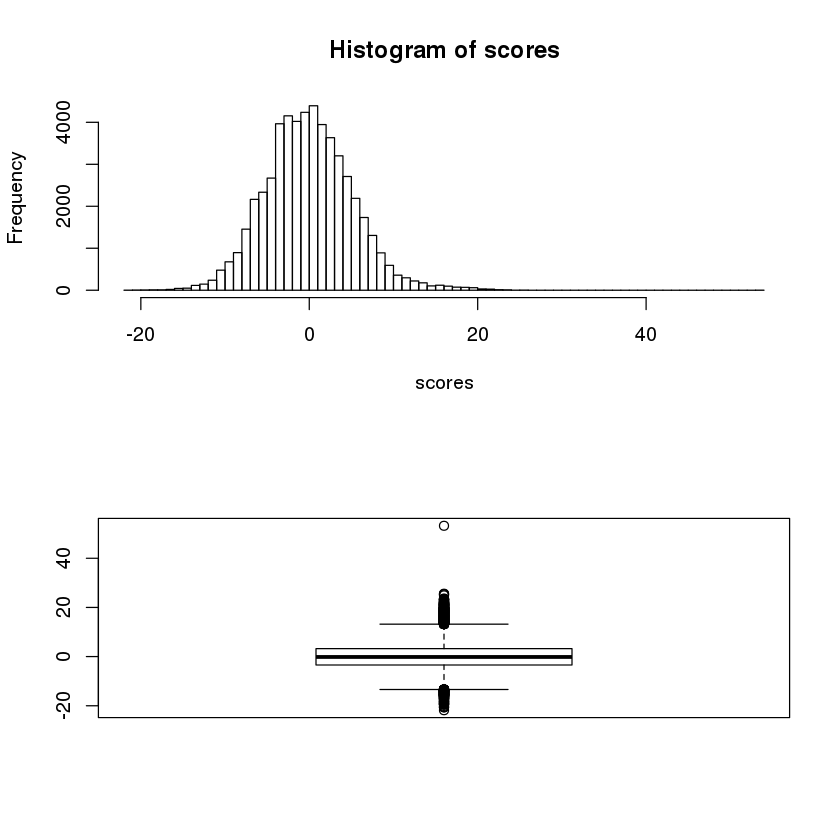

In [12]:
options(scipen=999)
par(mfrow=c(2,1));

#Create histogram of scores
hist(scores,breaks = 100)

#Drawing Boxplot
boxplot(scores,horizontal = FALSE)

Most of the rows have scores in the range of 100 to 500. Check rows with scores > 5000

In [13]:
print(range(scores))

[1] -21.82006  53.21628


In [14]:
length(which(scores>25))
diamonds[which(scores>25),]

[1] 4

carat,cut,color,clarity,depth,table,price,x,y,z
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.90,8.06
2.58,Fair,F,SI2,65.2,59,12500,8.58,8.51,5.57
2.00,Fair,F,SI2,70.2,57,15351,7.63,7.59,5.34
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.80,5.12


Look at the y value in first row. It clearly suggests y value is incorrect. It looks like the depth value has been incorrectly used for y. 

## Local Outlier Factor

Local outlier factor is another way of finding outliers. Read the below wiki page to learn how this method works. 

**Reference: ** 
- [Wiki](https://en.wikipedia.org/wiki/Local_outlier_factor)

### The LOF algorithm

**Reference: ** [lofactor()](https://www.rdocumentation.org/packages/DMwR/versions/0.4.1/topics/lofactor)

In [15]:
library(DMwR)

Loading required package: lattice
Loading required package: grid


In [16]:
# # point to the prostate data set in the h2o folder - no need to load h2o in memory yet

prostate_df <- read.table("/dsa/data/DSA-8630/prostate.txt",sep=',',header=TRUE)
head(prostate_df)

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0.0,6
2,0,72,1,3,2,6.7,0.0,7
3,0,70,1,1,2,4.9,0.0,6
4,0,76,2,2,1,51.2,20.0,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0.0,8


In [17]:
dim(prostate_df)

[1] 380   9

In [18]:
# # We don't need the ID field
prostate_df <- prostate_df[,-1]
summary(prostate_df)

    CAPSULE            AGE             RACE           DPROS      
 Min.   :0.0000   Min.   :43.00   Min.   :0.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:62.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :0.0000   Median :67.00   Median :1.000   Median :2.000  
 Mean   :0.4026   Mean   :66.04   Mean   :1.087   Mean   :2.271  
 3rd Qu.:1.0000   3rd Qu.:71.00   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :79.00   Max.   :2.000   Max.   :4.000  
     DCAPS            PSA              VOL           GLEASON     
 Min.   :1.000   Min.   :  0.30   Min.   : 0.00   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:  5.00   1st Qu.: 0.00   1st Qu.:6.000  
 Median :1.000   Median :  8.75   Median :14.25   Median :6.000  
 Mean   :1.108   Mean   : 15.41   Mean   :15.81   Mean   :6.384  
 3rd Qu.:1.000   3rd Qu.: 17.12   3rd Qu.:26.45   3rd Qu.:7.000  
 Max.   :2.000   Max.   :139.70   Max.   :97.60   Max.   :9.000  

Using lofactor(), you are just telling the function how many neighbours it should consider by giving a number to k when calculating the outliers. 

In [19]:
# k=5 indicates to pick top 5 outliers
outlier.scores <- lofactor(prostate_df, k=50)

Now that the outlier scores are calculated, pick the top 10 outliers with highest scores.

In [20]:
outliers <- order(outlier.scores, decreasing=T)[1:10]

# who are outliers
print(outliers)

 [1] 374  61 303 355  52 234 156 248 104  25


#### Visualize Outliers with Plots

Next, we show outliers with a biplot of the first two principal components.

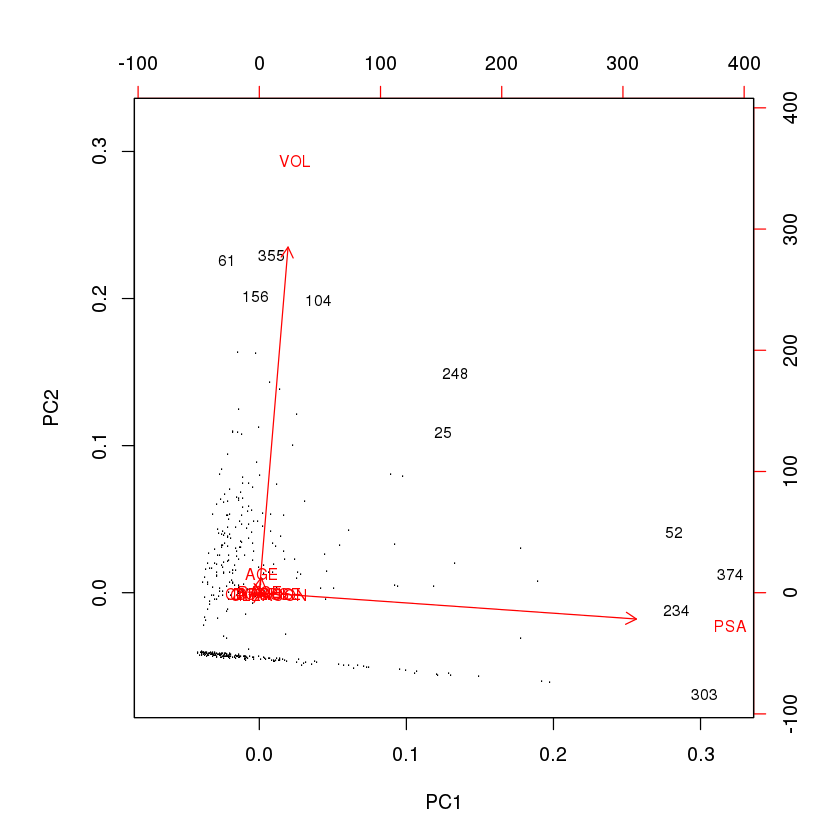

In [21]:
n <- nrow(prostate_df)
labels <- 1:n
labels[-outliers] <- "."
biplot(prcomp(prostate_df), cex=.8, xlabs=labels)

Its up to you to decide if below values are outliers and removed from dataset. It requires domain knowledge or knowledge about the data to make decisions on data. You may want to do more analysis before excluding them. 

In [22]:
prostate_df[outliers,]

,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
374,1,65,1,4,1,139.7,29.9,9
61,0,59,1,2,1,0.7,96.0,5
303,1,67,1,4,2,135.0,0.0,7
355,0,71,2,2,1,12.3,97.6,5
52,1,72,1,4,2,124.0,38.6,8
234,1,59,2,4,1,126.0,20.3,8
156,0,76,1,2,1,8.9,87.3,5
248,1,57,2,1,1,63.3,73.4,7
104,0,75,1,3,1,25.7,87.6,5
25,1,77,1,1,1,61.1,58.0,7


### Outliers Detection in Time Series data

In [23]:
library(tsoutliers)
library(expsmooth)
library(fma)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 


Attaching package: ‘fma’

The following object is masked from ‘package:DMwR’:

    sales



The data in table_a has the historical stock data of different companies. It has following fields Date, Time, Open, High, Low, Close, Volume.  


- Date – This provides the date as an integer where 20100527 would represent May 27th, 2010.
- Time – This gives the time as an integer where 1426 would represent 2:26PM EST.
- Open – The open price.
- High – The high price.
- Low – The low price.
- Close – The close price.
- Volume – The trading volume during the interval. Note that it is extremely difficult to get accurate volume information. The volume is adjusted for splits so that the total value of shares traded remains constant even if a split occurs.

In [24]:
names=c("Date","Time","Open","High","Low","Close","Volume")
stock = read.csv("/dsa/data/DSA-8630/table_a.csv",header=FALSE)
names(stock) = names

In [25]:
head(stock)

Date,Time,Open,High,Low,Close,Volume
19991118,0,42.2076,46.3820,37.4581,39.1928,43981813
19991119,0,39.8329,39.8885,36.9293,37.6251,11390201
19991122,0,38.3208,40.0091,37.1613,39.9442,4654716
19991123,0,39.4247,40.4729,37.3375,37.5138,4268903
19991124,0,37.2262,38.9052,37.1056,38.0889,3602367
19991126,0,37.9219,38.4971,37.8013,38.2095,1332198


Convert the Close column into a time series data. start and end has the time periods for which the data is available. Since we have the data for everyday (although there are some missing dates) we will use frequency=30.

In [26]:
stock_series <- ts(stock$Close, start=c(1999, 11, 18), end=c(2013, 08, 09), frequency=30)

In [27]:
stock_series[1:100]

[1]  39.1928  37.6251  39.9442  37.5138  38.0889  38.2095  38.9052  39.1371
  [9]  40.1204  41.5119  41.6881  42.3839  41.9757  41.6881  42.4395  41.9200
 [17]  41.6881  39.0815  38.6733  42.0963  42.6158  43.3115  43.2558  43.4878
 [25]  46.0388  48.9887  56.8179  64.0628  72.8754  71.7158  66.6138  60.8161
 [33]  57.9775  54.5545  60.4172  63.8309  62.9682  61.3448  62.9033  63.4320
 [41]  66.3263  65.6305  63.2001  63.5990  63.4877  62.6713  63.3671  63.6639
 [49]  62.9033  61.3448  66.0387  68.8773  72.1240  70.7325  73.8030  72.7084
 [57]  70.2131  71.0201  69.9812  70.7325  75.3707  75.1388  76.5303  87.3187
 [65]  84.9996  91.8920  98.0979 100.4170  92.6527  95.3150 101.0570  95.8994
 [73] 100.6490 141.3540 128.7100 134.4520 141.4650 132.6530 121.8080 112.7080
 [81] 107.3740 110.6770 112.2440 105.2870 105.5190 110.7420 111.3170 108.4230
 [89] 106.2150 110.5650 103.4320  96.8270  96.4189  90.7325  86.2705  89.4616
 [97]  96.9940 114.0440  98.7936  93.3484

The package detects 5 different types of outliers iteratively in time series data:

- Additive Outlier (AO)
- Innovation Outlier (IO)
- Level Shift (LS)
- Temporary change (TC)
- Seasonal Level Shift (SLS)

[Click here for definition of these outliers](https://www.ibm.com/support/knowledgecenter/SS3RA7_15.0.0/com.ibm.spss.modeler.help/ts_outliers_overview.htm)

In below cell we are looking for Additive, Level shift and temporarry chnage outliers in data.

Series: stock_series 
ARIMA(0,1,0)                    

Coefficients:
         TC74     TC77     TC98     LS170
      38.9411  14.5143  21.0632  -23.8311
s.e.   2.9307   2.9307   2.9228    3.1702

sigma^2 estimated as 10.15:  log likelihood=-1072.84
AIC=2155.67   AICc=2155.82   BIC=2175.84

Outliers:
  type ind    time coefhat  tstat
1   TC  74 2001:24   38.94 13.287
2   TC  77 2001:27   14.51  4.952
3   TC  98 2002:18   21.06  7.206
4   LS 170 2004:30  -23.83 -7.517

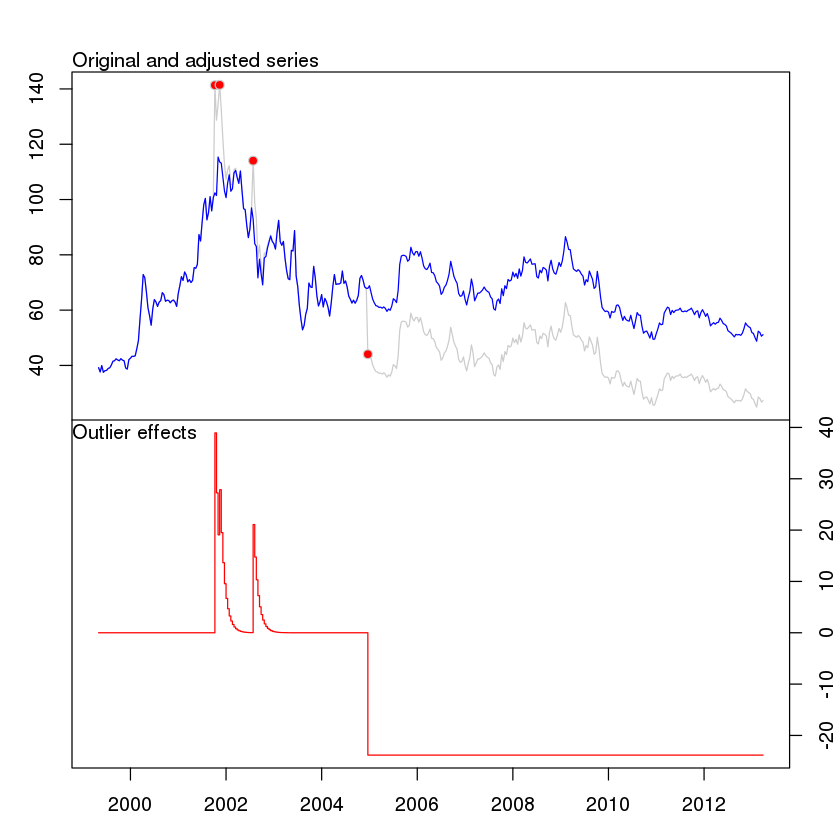

In [28]:
stock_outliers <- tso(stock_series,types = c("AO","LS","TC"),maxit.iloop=10)
stock_outliers
plot(stock_outliers)

## Extra

-----


**Have you used apply() before.. Here's something similar but does little more than that** 

- [sweep()](https://stat.ethz.ch/R-manual/R-devel/library/base/html/sweep.html)

**Syntax:** sweep(x, MARGIN, STATS, FUN="-", check.margin=T, ...)


sweep is similar to apply() where yu apply a function to each column or row of a dataframe. But sweep is typically used when you operate a matrix by row or by column, and need the flexibility for the input of the operation to have a different value for each row / column. Whether you operate by row(1) or column(2) is defined by MARGIN, the second parameter in below code. So in below piece of code, for each column you will take a value from c(10, 20, 30) which is being defined by STATS parameter and use in the operation "+" defined by FUN parameter.

In [29]:
# Sample code explaining what sweep() is doing
a = c(130,110,118,112,128)
b = c(26,24,25,25,26)
c = c(140,155,142,175,170)
names=c("Weight","Waist","Height")
size = data.frame(a,b,c)
names(size)=names
print(size)

# We are adding values 10, 20, 30 to columns 
sweep(size, 2, c(10, 20, 30), "+")


  Weight Waist Height
1    130    26    140
2    110    24    155
3    118    25    142
4    112    25    175
5    128    26    170


Weight,Waist,Height
140,46,170
120,44,185
128,45,172
122,45,205
138,46,200
